# Notes about tessellation scheme for Roman

## Genesis of the tessellation

1. Healpix
2. Double pixelization
3. Voronoi
4. Roman tessellation

## Double pixelization & Voronoi

In [21]:
# Common packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp

In [22]:
from skymap.skymap import doublepixelization

NSIDE = 3
radius = 1
ntheta, nphi, vertices = doublepixelization(NSIDE,radius)


from scipy.spatial import SphericalVoronoi, geometric_slerp
from mpl_toolkits.mplot3d import proj3d
import numpy as np
from skymap.skymap import ang2point

radius = 1
center = [0,0,0]
points = ang2point(90 - ntheta, nphi,radius)
# Voronoi
sv = SphericalVoronoi(points, radius, center)

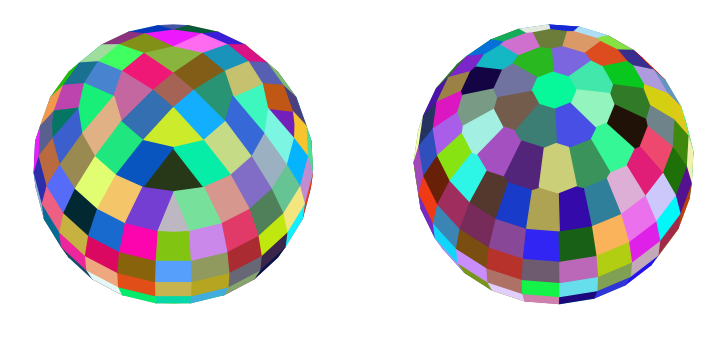

In [23]:
# Double pixelization: polygons
#%matplotlib ipympl
%matplotlib inline
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from skymap.skymap import ang2point
import numpy as np

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(121, projection='3d',aspect='equal') 
a = 0.65; ax.set_xlim(-a,a); ax.set_ylim(-a,a); ax.set_zlim(-a,a); ax.set_axis_off()
for n, vertices_ in enumerate(vertices):
    random_color = colors.rgb2hex(np.random.rand(3))
    polygon = Poly3DCollection([vertices_], alpha=1)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)
    #print(n, vertices_)
  
# Update the axis view and title
elev = 60; azim = 0; roll = 0
ax.view_init(elev, azim, roll)

ax = fig.add_subplot(122, projection='3d',aspect='equal') 
a=0.65; ax.set_xlim(-a,a); ax.set_ylim(-a,a); ax.set_zlim(-a,a); ax.set_axis_off()
sv.sort_vertices_of_regions()
for n in range(0, len(sv.regions)):
    region = sv.regions[n]
    random_color = colors.rgb2hex(np.random.rand(3))
    polygon = Poly3DCollection([sv.vertices[region]], alpha=1)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)
 
# Update the axis view and title
elev = 60; azim = 20; roll = 0
ax.view_init(elev, azim, roll)
plt.show()


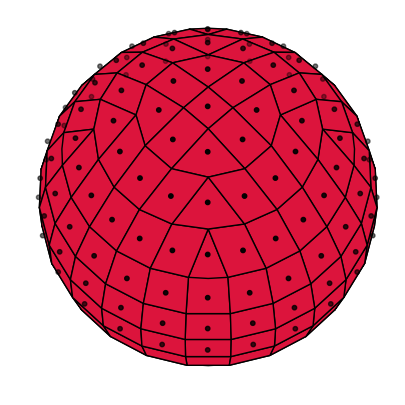

In [91]:
# Double pixelization: polygons
#%matplotlib ipympl
%matplotlib inline
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from skymap.skymap import ang2point
import numpy as np

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111, projection='3d',aspect='equal') 
a = 0.65; ax.set_xlim(-a,a); ax.set_ylim(-a,a); ax.set_zlim(-a,a); ax.set_axis_off()
idn = ((nphi > 120) | (nphi<120))& (ntheta <100)
ax.scatter(points[idn, 0], points[idn, 1], points[idn, 2], c='k',s=10)
for n, vertices_ in enumerate(vertices):
    #random_color = colors.rgb2hex(np.random.rand(3))
    polygon = Poly3DCollection([vertices_], alpha=1,facecolor='crimson', edgecolor='black')
    #polygon.set_facecolor('crimson')
    #polygon.set_edgecolor('black')
    #ls = LightSource(azdeg=225.0, altdeg=45.0)
    
    #rgb = ls.blend_hsv(rgb=ls.shade(facearray, plt.cm.Reds), intensity=ls.shade_normals(normals, fraction=0.25))
    #polygon.set_facecolor(rgb[:, 0])
    ax.add_collection3d(polygon)
    #ax.scatter([points[n, 0]], [points[n, 1]], [points[n, 2]], c='k',s=10)
    #print(n, vertices_)#
#ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='k',s=10)

# Update the axis view and title
elev = 60; azim = 0; roll = 0
ax.view_init(elev, azim, roll)
plt.show()
fig.savefig('doublepixsphere.png',bbox_inches="tight")

## Roman tessellation

### Computing N

N is the number of subdivisions of a diamond in the Healpix scheme. N is linked to the area of a tile, since the tessellation approximately subdivides the sphere in equal area spherical polygons.

In [191]:
# Number of sky cells (or tessels)
import math

Nside = 13
Nhp = 12 * Nside**2
Ndp = 2 * Nhp + 2
# FOV = 4 * np.pi / (Ndp-2) # Double pixelization
FOV = 4 * np.pi / (Ndp-2) # Roman tessellation
Size = np.sqrt(FOV) * 180/np.pi
print('N {0:d} Nd {1:d} Cell side {2:.2f} degs'.format(Nside, Ndp, Size))
print('Area of the tile {0:.2f} sq degs '.format(Size**2))

pixsize = 0.05/3600 # The size of a pixel will be 0.05"
npixels = int(np.sqrt(FOV)* (180/np.pi) / pixsize)
print('Number of pixels on one side', npixels)
print('Number of patches on one side', npixels/4500)

N 13 Nd 4058 Cell side 3.19 degs
Area of the tile 10.17 sq degs 
Number of pixels on one side 229620
Number of patches on one side 51.026666666666664


###### Obtaining the tiles

In [192]:
from skymap.skymap import romantessellation

NSIDE = 13
radius = 1
ntheta, nphi, vertices = romantessellation(NSIDE,radius)
print(len(ntheta))

4058


### Projection on a sphere

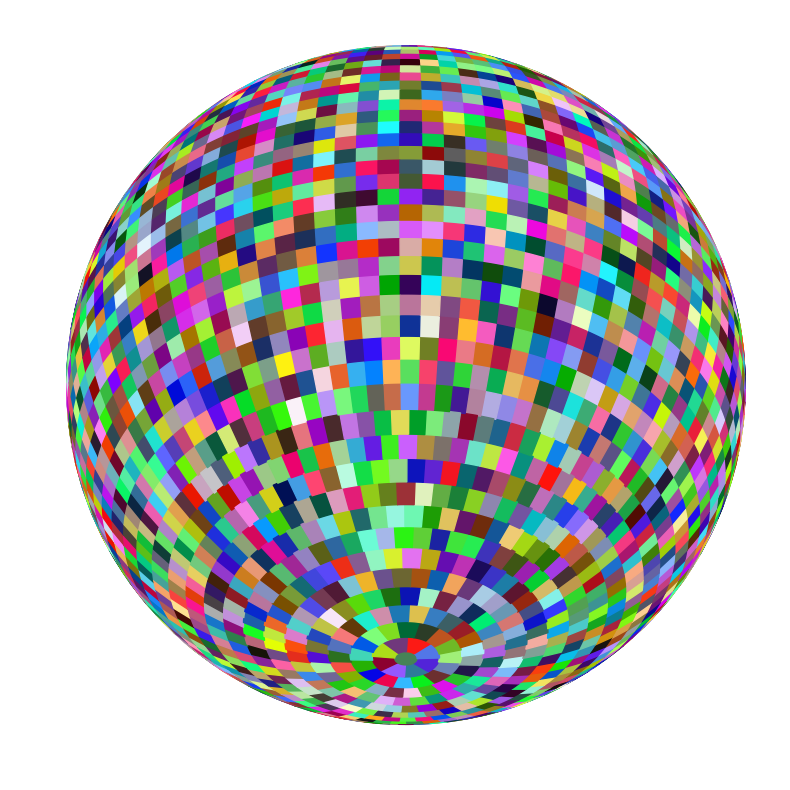

In [154]:
# Double pixelization: polygons
#%matplotlib ipympl
%matplotlib inline
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from skymap.skymap import ang2point
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d',aspect='equal') 
a = 0.65; ax.set_xlim(-a,a); ax.set_ylim(-a,a); ax.set_zlim(-a,a)#; ax.set_axis_off()
for n, vertices_ in enumerate(vertices):
    random_color = colors.rgb2hex(np.random.rand(3))
    polygon = Poly3DCollection([vertices_], alpha=1)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)
    #print(n, vertices_)
  
# Update the axis view and title
#elev = 60; azim = 20; roll = 0
elev = -40; azim = 20; roll = 0
ax.view_init(elev, azim, roll)
ax.set_axis_off() 
plt.show()
fig.savefig('tessellation3p2degs.png',bbox_inches="tight")

### Lambert projection of tiles

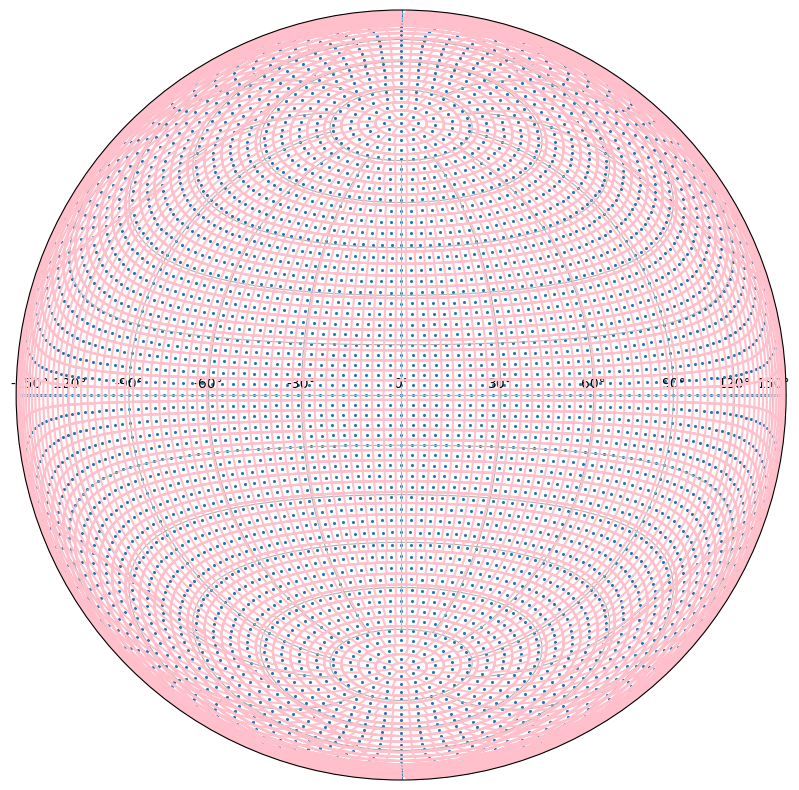

In [241]:
%matplotlib inline
from astropy.coordinates import cartesian_to_spherical as cart2sph
from skymap.skymap import ang2point
from scipy.spatial import SphericalVoronoi, geometric_slerp
import healpy as hp
import sys
from skymap.skymap import doublepixelization

NSIDE = 13
radius = 1
ntheta, nphi, ramin, ramax, decmin, decmax, vertices = romantessellation(NSIDE)

radius = 1
center = [0,0,0]
points = ang2point(90 - ntheta, nphi,radius)

    
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='lambert',aspect='equal') 
#ax = fig.add_subplot(111, projection='mollweide',aspect='equal') 
plt.grid(True)
plt.scatter(np.deg2rad(180-nphi),np.deg2rad(90-ntheta),marker='.',s=6)
#ax.set_axis_off()
# Voronoi
sv = SphericalVoronoi(points, radius, center)
sv.sort_vertices_of_regions()
plotVoronoi = False
if plotVoronoi:
    for n in range(0, len(sv.regions)):
        region = sv.regions[n]
        vvertices = sv.vertices[region]
        ra = []
        dec = []
        for vertex in vvertices:
            x,y,z = vertex
            pol = cart2sph(x,y,z)
            ra.append(pol[2].value)
            dec.append(pol[1].value)
        ra.append(ra[0])
        dec.append(dec[0])
        ra = np.rad2deg(np.array(ra))-180
        dec = np.rad2deg(np.array(dec))
        #print('ra  ', ra)
        #print('dec ', dec)
        plt.plot(np.deg2rad(ra), np.deg2rad(dec), color='pink')

for vertices_ in vertices:
        ra = []
        dec = []
        for n, vertex in enumerate(vertices_):
            x,y,z = vertex
            pol = cart2sph(x,y,z)
            r = pol[2].value
            ra.append(r)
            dec.append(pol[1].value)
        ra = np.array(ra)
        ra =  np.rad2deg(ra)
        medra = np.nanmedian(ra)
        if medra >= 270:
            id = ra == 0.
            ra[id] += 360
        dec = np.rad2deg(np.array(dec))
        plt.plot(np.deg2rad(ra-180), np.deg2rad(dec), color='pink')
               
plt.show()    
fig.savefig('tessellation.png',bbox_inches="tight", pad_inches=0.2, transparent=True)

### Mollweide projection of tiles

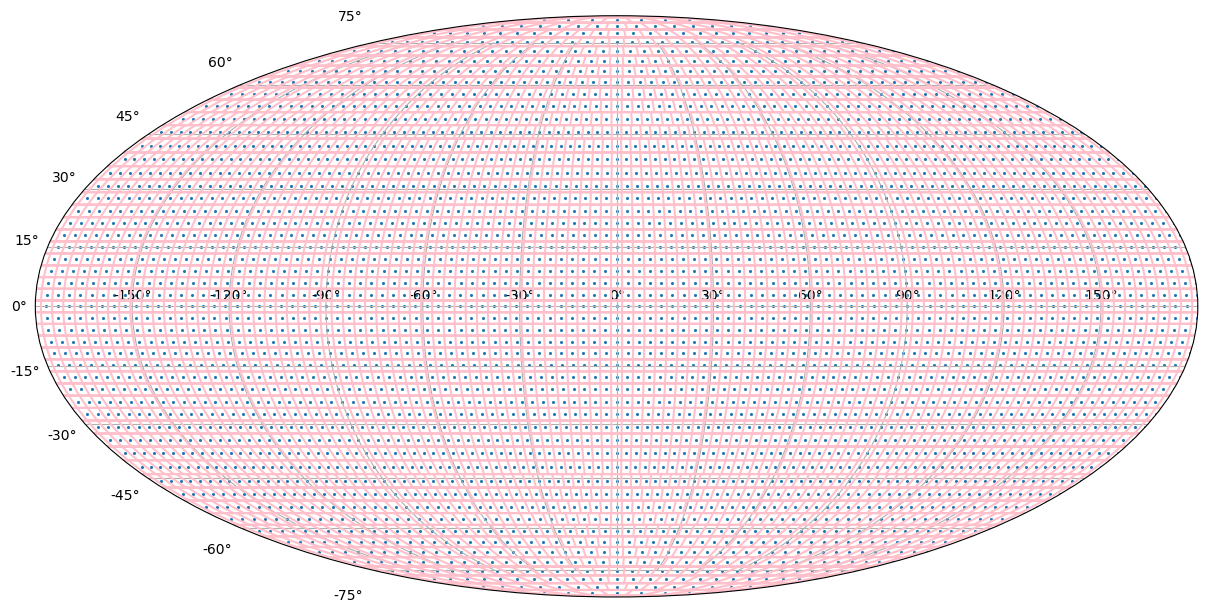

In [242]:
fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111, projection='lambert',aspect='equal') 
ax = fig.add_subplot(111, projection='mollweide',aspect='equal') 
plt.grid(True)
plt.scatter(np.deg2rad(180-nphi),np.deg2rad(90-ntheta),marker='.',s=6)

for vertices_ in vertices:
        ra = []
        dec = []
        for n, vertex in enumerate(vertices_):
            x,y,z = vertex
            pol = cart2sph(x,y,z)
            r = pol[2].value
            ra.append(r)
            dec.append(pol[1].value)
        ra = np.array(ra)
        ra =  np.rad2deg(ra)
        medra = np.nanmedian(ra)
        if medra >= 270:
            id = ra == 0.
            ra[id] += 360
        dec = np.rad2deg(np.array(dec))
        plt.plot(np.deg2rad(ra-180), np.deg2rad(dec), color='pink')
               
plt.show()    

# Single tile

In [1]:
from astropy.wcs import WCS
from skymap.skymap import romantessellation


wcs = WCS(naxis=2)
wcs.wcs.crpix = [0., 0.]
pix = .05/3600 # Pixel size
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# Points
NSIDE = 13
radius = 1
ntheta, nphi, ramin, ramax, decmin, decmax, vertices = romantessellation(NSIDE)
ntiles = len(vertices)


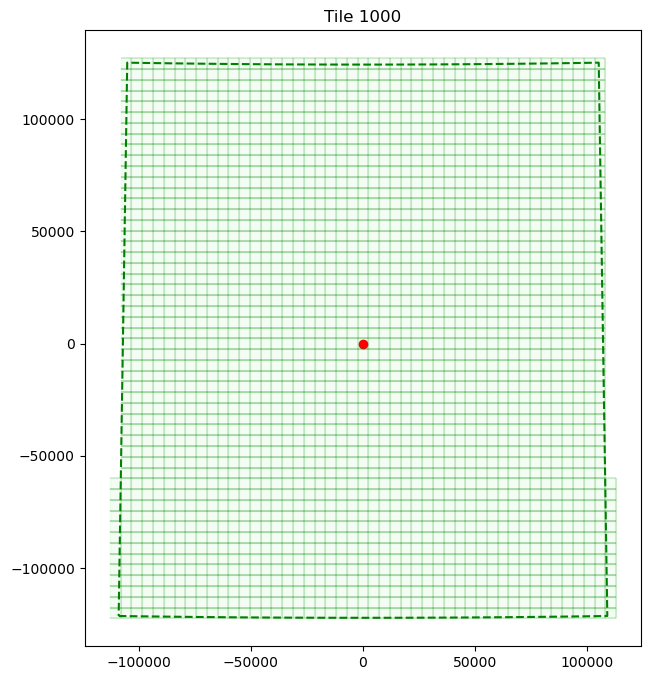

In [2]:
import matplotlib.pyplot as plt
from astropy.coordinates import cartesian_to_spherical as cart2sph
import numpy as np

# Tile
itile = 1000

# Pixel and cell size
cellsize = 4800

# Center and limits of tile
rmin, rmax = ramin[itile], ramax[itile]
dmin, dmax = decmin[itile], decmax[itile]
if dmax < dmin:
    dmin, dmax = dmax, dmin
ra0, dec0 = nphi[itile], 90-ntheta[itile]

# Tile size in pixels
if itile in [0, ntiles-1]:
    ny = np.abs(dmin - dmax) / pix * 2
    nx = ny
else:
    ny = np.abs(dmin - dmax) / pix
    nx = np.abs(rmax - rmin) * np.cos(dec0 * np.pi/180) / pix
nx, ny = nx // 2, ny //2

# Projection of a tile
wcs.wcs.crval = [ra0, dec0]
wcs.wcs.crpix = [nx, ny]

ra, dec = [], []
vertices_ = vertices[itile]
for vertex in vertices_:
    x, y, z = vertex
    pol = cart2sph(x, y, z)
    ra.append(pol[2].value)
    dec.append(pol[1].value)
dec.append(dec[0])
medra = np.nanmedian(np.rad2deg(np.array(ra)))
ra.append(ra[0])
ra =  np.rad2deg(np.array(ra))
dec = np.rad2deg(np.array(dec))

values, counts = np.unique(dec, return_counts=True)
if medra >= 270:
    id = ra == 0.
    ra[id] += 360

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, aspect='equal') 
x, y = wcs.wcs_world2pix(ra, dec, 1)
ax.plot(x-nx, y-ny, '--g')
# Plot center of projection
xc, yc = wcs.wcs_world2pix(ra0, dec0, 1)
ax.plot([xc-nx],[yc-ny],'or')
    
# Grid of cells
n = 35
row, col = np.indices((2*n+1, 2*n+1))
row, col = row - n, col - n

# Tile centers
x0, y0 = row * cellsize + nx, col * cellsize + ny
hcellsize = cellsize // 2

# Cell corners
x1, y1 = x0 - hcellsize, y0 - hcellsize
x2, y2 = x0 + hcellsize, y0 - hcellsize
x3, y3 = x0 + hcellsize, y0 + hcellsize
x4, y4 = x0 - hcellsize, y0 + hcellsize

# Cell coordinates
a0, d0 = wcs.wcs_pix2world(x0, y0, 1)
a1, d1 = wcs.wcs_pix2world(x1, y1, 1)
a2, d2 = wcs.wcs_pix2world(x2, y2, 1)
a3, d3 = wcs.wcs_pix2world(x3, y3, 1)
a4, d4 = wcs.wcs_pix2world(x4, y4, 1)


if rmin < 0:
    idn = a0 > 270
    a0[idn] -= 360
    a1[idn] -= 360
    a2[idn] -= 360
    a3[idn] -= 360
    a4[idn] -= 360

# Conditions
# Case of pole tiles
if itile == 0:
    c1 = d1 >= dmin
    c2 = d2 >= dmin
    c3 = d3 >= dmin
    c4 = d4 >= dmin
elif itile == ntiles-1:
    c1 = d1 < dmax
    c2 = d2 < dmax
    c3 = d3 < dmax
    c4 = d4 < dmax
# Case of generic ring tiles
else:
    c1 = (a1 >= rmin) & (a1 < rmax) & (d1 >= dmin) & (d1 < dmax)
    c2 = (a2 >= rmin) & (a2 < rmax) & (d2 >= dmin) & (d2 < dmax)
    c3 = (a3 >= rmin) & (a3 < rmax) & (d3 >= dmin) & (d3 < dmax)
    c4 = (a4 >= rmin) & (a4 < rmax) & (d4 >= dmin) & (d4 < dmax)

# Cells inside the tile (at least one corner is in)
idx, idy = np.where(c1 | c2 | c3 | c4)

# Draw cells
for idx_, idy_ in zip(idx, idy):
    xc = np.array([x1[idx_,idy_], x2[idx_,idy_], x3[idx_,idy_], x4[idx_,idy_]])-nx
    yc = np.array([y1[idx_,idy_], y2[idx_,idy_], y3[idx_,idy_], y4[idx_,idy_]])-ny
    ax.fill_between([min(xc), max(xc)], min(yc), max(yc), color='lightgreen',alpha=0.1)
    plt.plot(xc, yc, color='green',linewidth=0.2)    

ax.set_title('Tile {0:d}'.format(itile))
fig.savefig('tile{0:d}.png'.format(itile),bbox_inches="tight", 
            pad_inches=0.2, transparent=True)
plt.show()

## Size of tiles

In [5]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

ntiles = len(ntheta)
dx = []
dy = []
areas = []
ncells = []
ncellsin = []
cellsize = 4800
hcellsize = cellsize // 2
# Grid of cells
n = 35
row, col = np.indices((2*n+1, 2*n+1))
row, col = row - n, col - n


for itile in range(ntiles):
    # counter
    if (itile % 1000) == 0:
        print('\n'+str(itile), end='')
    elif (itile %100) == 0:
        print('.', end='')
    # Tile center and limits
    ra0, dec0 = nphi[itile], 90 - ntheta[itile]
    wcs.wcs.crval = [ra0, dec0]
    ramin_, ramax_ = ramin[itile], ramax[itile]
    decmin_, decmax_ = decmin[itile], decmax[itile]
    if decmin_ > decmax_: decmin_, decmax_ = decmax_, decmin_
    # Tile size in pixels
    if itile in [0, ntiles-1]:
        ny = np.abs(decmin_ - decmax_) / pix * 2
        nx = ny
    else:
        ny = np.abs(decmin_ - decmax_) / pix
        maxcos = np.nanmax([np.cos(decmin_ * np.pi/180),np.cos(decmax_ * np.pi/180)])
        nx = np.abs(ramax_ - ramin_) * maxcos
    nx, ny = nx // 2, ny //2
    wcs.wcs.crpix = [nx, ny]
    # Cell centers
    x0, y0 = row * cellsize + nx, col * cellsize + ny
    # Cell corners
    x1, y1 = x0 - hcellsize, y0 - hcellsize
    x2, y2 = x0 + hcellsize, y0 - hcellsize
    x3, y3 = x0 + hcellsize, y0 + hcellsize
    x4, y4 = x0 - hcellsize, y0 + hcellsize
    # Cell corners
    a0, d0 = wcs.wcs_pix2world(x0, y0, 1)
    a1, d1 = wcs.wcs_pix2world(x1, y1, 1)
    a2, d2 = wcs.wcs_pix2world(x2, y2, 1)
    a3, d3 = wcs.wcs_pix2world(x3, y3, 1)
    a4, d4 = wcs.wcs_pix2world(x4, y4, 1)
    if ramin_ < 0:
        idn = a0 > 270
        a0[idn] -= 360
        a1[idn] -= 360
        a2[idn] -= 360
        a3[idn] -= 360
        a4[idn] -= 360
    # Conditions
    # Case of pole tiles
    if itile == 0:
        c1 = d1 >= decmin_
        c2 = d2 >= decmin_
        c3 = d3 >= decmin_
        c4 = d4 >= decmin_
    elif itile == ntiles-1:
        c1 = d1 < decmax_
        c2 = d2 < decmax_
        c3 = d3 < decmax_
        c4 = d4 < decmax_
    # Case of generic ring tiles
    else:
        c1 = (a1 >= ramin_) & (a1 < ramax_) & (d1 >= decmin_) & (d1 < decmax_)
        c2 = (a2 >= ramin_) & (a2 < ramax_) & (d2 >= decmin_) & (d2 < decmax_)
        c3 = (a3 >= ramin_) & (a3 < ramax_) & (d3 >= decmin_) & (d3 < decmax_)
        c4 = (a4 >= ramin_) & (a4 < ramax_) & (d4 >= decmin_) & (d4 < decmax_)
    # Write down cells
    #idx, idy = np.where(c1 | c2 | c3 | c4)
    idx = c1 | c2 | c3 | c4
    nt = np.sum(idx)
    # Limits in x and y
    xmin, xmax = min(x0[idx]), max(x0[idx])
    ymin, ymax = min(y0[idx]), max(y0[idx])
    # Internal cells
    idx = c1 & c2 & c3 & c4
    nin = np.sum(idx)

    # 2ble pixelization
    ra2 = []
    dec2 = []
    vertices_ = vertices[itile]
    for vertex in vertices_:
        x,y,z = vertex
        pol = cart2sph(x,y,z)
        ra2.append(pol[2].value)
        dec2.append(pol[1].value)
    dec2.append(dec2[0])
    medra = np.nanmedian(np.rad2deg(np.array(ra2)))
    ra2.append(ra2[0])
    ra2 =  np.rad2deg(np.array(ra2))

    values, counts = np.unique(dec2, return_counts=True)
    if medra >= 270:
        id = ra2 == 0.
        ra2[id] += 360
        
    dec2 = np.rad2deg(np.array(dec2))
    x2,y2 = wcs.wcs_world2pix(ra2, dec2, 1)
    x0,y0 = wcs.wcs_world2pix(ra0, dec0, 1)
    areas.append(PolyArea(x2,y2))

    deltax = xmax - xmin
    deltay = ymax - ymin
    dx.append(deltax)
    dy.append(deltay)
    ncells.append(nt)
    ncellsin.append(nin)
print()
dx = np.array(dx)
dy = np.array(dy)
areas = np.array(areas)
ncells = np.array(ncells)
ncellsin = np.array(ncellsin)


0.........
1000.........
2000.........
3000.........
4000


## Plots

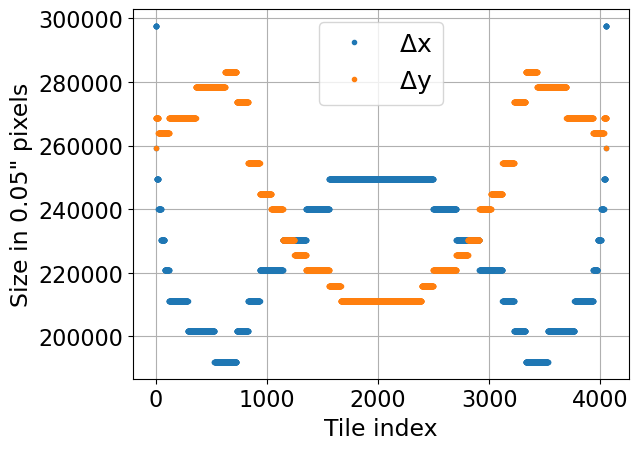

max dx and dy  297600.0 283200.0
max sky cells x and y  62 59


In [19]:
fig = plt.figure()
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.plot(dx,'.',label='$\\Delta$x')
plt.plot(dy,'.',label='$\\Delta$y')
#plt.plot(dx,label='$\\Delta$x')
#plt.plot(dy,label='$\\Delta$y')
plt.grid()
plt.legend(fontsize=18)
plt.ylabel('Size in 0.05" pixels')
plt.xlabel('Tile index')
fig.savefig('tilesxysize.png',bbox_inches="tight")
plt.show()
print('max dx and dy ', max(dx), max(dy))
print('max sky cells x and y ', round(max(dx)/cellsize), round(max(dy)/cellsize))

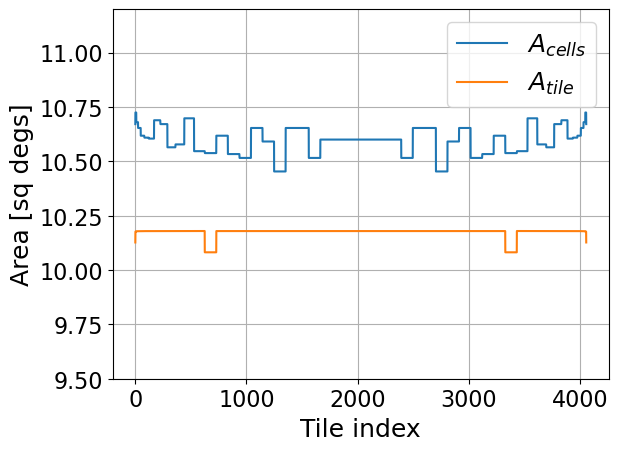

In [20]:
narea = areas / cellsize**2
areacell = (cellsize * 0.05/3600)**2
fig = plt.figure()
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.plot(ncells * areacell,'-',label='$A_{cells}$')
#plt.plot(ncellsin,'-',label='$N_{cells, inside}$')
plt.plot(areas * (0.05/3600)**2, label='$A_{tile}$')
plt.grid()
plt.legend(fontsize=18)
plt.ylabel('Area [sq degs]', fontsize=18)
plt.xlabel('Tile index', fontsize=18)
#plt.yscale('log')
#plt.ylim(2100,2600)
plt.ylim(9.5,11.2)
fig.savefig('cellesnumber.png',bbox_inches="tight")
plt.show()

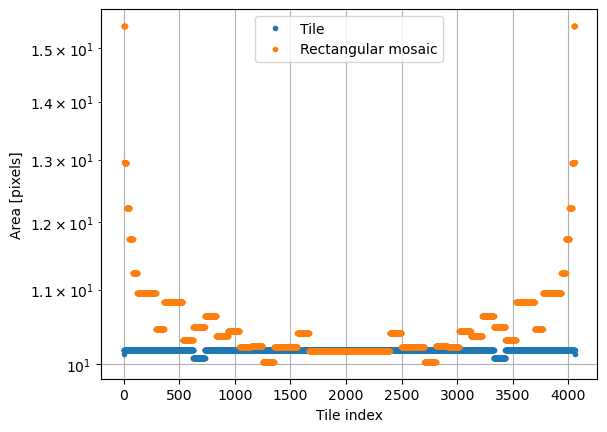

In [243]:
dx = np.array(dx)
dy = np.array(dy)
pixarea = (0.05/3600)**2
plt.plot(areas * pixarea ,'.',label='Tile')
plt.plot(dx*dy * pixarea,'.',label='Rectangular mosaic')
#plt.ylim(2e10,2.8e10)
#plt.ylim(4,5)
plt.grid()
plt.legend()
plt.ylabel('Area [pixels]')
plt.xlabel('Tile index')
plt.yscale('log')
plt.show()

## Reading table

In [166]:
from astropy.table import Table
data = Table.read('romantessellation.fits', format='fits')

In [173]:
data[1020:1040]

cra,cdec,ramin,ramax,decmin,decmax
float32,float32,float32,float32,float32,float32
287.30768,30.851887,285.57693,289.03845,32.57897,29.155365
290.76923,30.851887,289.03845,292.5,32.57897,29.155365
294.23077,30.851887,292.5,295.96155,32.57897,29.155365
297.69232,30.851887,295.96155,299.42307,32.57897,29.155365
301.15384,30.851887,299.42307,302.8846,32.57897,29.155365
304.6154,30.851887,302.8846,306.34616,32.57897,29.155365
...,...,...,...,...,...
332.30768,30.851887,330.57693,334.03845,32.57897,29.155365
335.76923,30.851887,334.03845,337.5,32.57897,29.155365


In [184]:
decs = data['cdec']
udecs = np.unique(decs)
print(len(udecs.astype('int')))

53


In [185]:
# Transform table into pandas dataframe
df = data.to_pandas()
df

,cra,cdec,ramin,ramax,decmin,decmax
0,0.0,90.00000,0.0,360.0,88.200623,90.000000
1,0.0,86.40081,-22.5,22.5,88.200623,84.600098
2,45.0,86.40081,22.5,67.5,88.200623,84.600098
3,90.0,86.40081,67.5,112.5,88.200623,84.600098
4,135.0,86.40081,112.5,157.5,88.200623,84.600098
...,...,...,...,...,...,...
4053,180.0,-86.40081,157.5,202.5,-84.600098,-88.200623
4054,225.0,-86.40081,202.5,247.5,-84.600098,-88.200623
4055,270.0,-86.40081,247.5,292.5,-84.600098,-88.200623
4056,315.0,-86.40081,292.5,337.5,-84.600098,-88.200623


# WFI field

In [92]:
import pysiaf
import matplotlib.pyplot as plt
%matplotlib inline

(array([1617.05047824, 1390.90858906, 1006.565839  , 1233.58155886,
       1617.05047824]), array([ -955.68384644, -1344.42449971, -1125.52991697,  -734.52891118,
        -955.68384644]))
(array([1617.05047824, 1390.90858906, 1006.565839  , 1233.58155886]), array([ -955.68384644, -1344.42449971, -1125.52991697,  -734.52891118]))


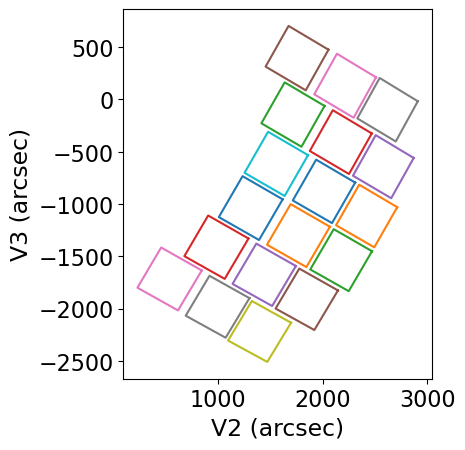

In [93]:
import matplotlib.pyplot as plt
import pysiaf
instrument = "roman"
siaf = pysiaf.Siaf(instrument)
siaf.apertures
#siaf.plot()
print(siaf['WFI01_FULL'].closed_polygon_points(to_frame='tel'))
print(siaf['WFI01_FULL'].corners(to_frame='tel'))
for i in range(1,19):
    siaf[f"WFI{i:02}_FULL"].plot()

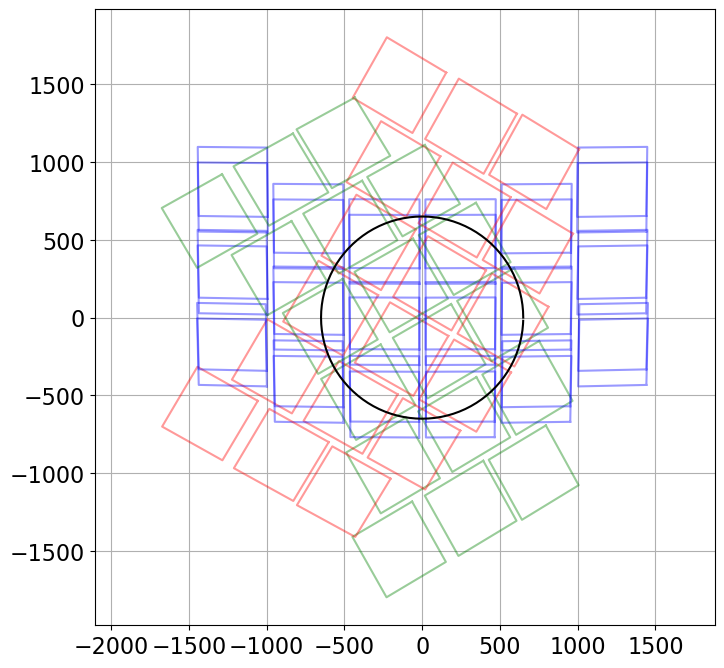

In [94]:
import numpy as np
x_shift = 0
y_shift = 0
angle = -60 * np.pi/180

fig,ax = plt.subplots(figsize=(8,8))
for i in range(1,19):
    coord = siaf[f"WFI{i:02}_FULL"].closed_polygon_points(to_frame='tel')
    xs, ys = coord
    xs -= 1900
    ys += 1100
    xr = (xs * np.cos(angle)) - (ys * np.sin(angle)) + x_shift
    yr = (xs * np.sin(angle)) + (ys * np.cos(angle)) + y_shift
    ax.plot(xs,ys,color='red',alpha=0.4)
    ax.plot(xr,yr,color='blue',alpha=0.4)
    xr_ = (xs * np.cos(-angle)) - (ys * np.sin(-angle)) + x_shift
    yr_ = (xs * np.sin(-angle)) + (ys * np.cos(-angle)) + y_shift
    ax.plot(xr_,yr_,color='green',alpha=0.4)
    ax.plot(xr,yr-100,color='blue',alpha=0.4)
theta = np.arange(0,2*np.pi,np.pi/100)
radius = 650
ax.plot(radius * np.cos(theta), radius * np.sin(theta),color='black')
ax.grid()
plt.axis('equal')
plt.show()
fig.savefig('fov.png')

In [137]:
size = 650/3600
fov = 3.2 # degs
print('Size of field ', size*2)
probability = ((fov-size*2)/fov)**2
print('Probability ' , probability)

Size of field  0.3611111111111111
Probability  0.7870400511188271


# Figure with definitions

ramin max  216.3461538461539 219.8076923076923
Latitude difference:  205.41629799126966 arcmin
delta  600.0
Dx, Dy Area 217790.5542568177 247427.94228952235 0.053887468689858976


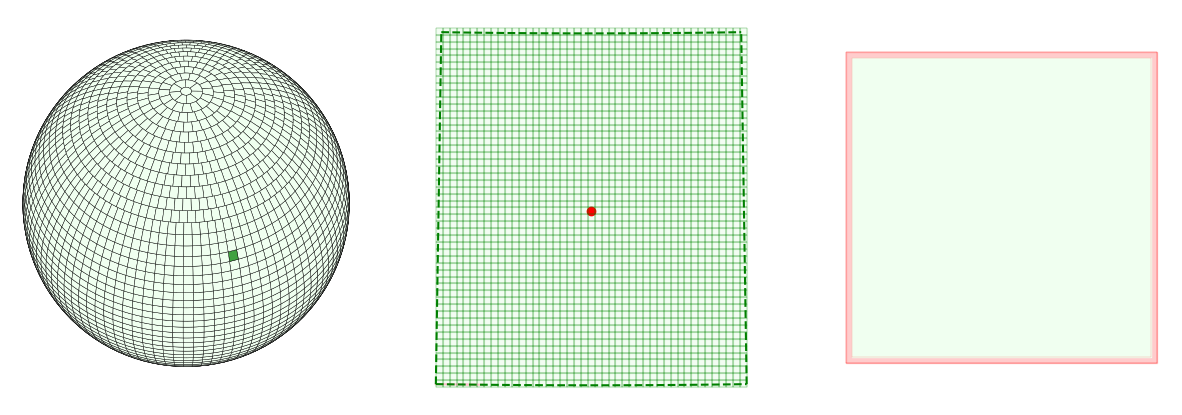

In [58]:
%matplotlib inline
from astropy.coordinates import cartesian_to_spherical as cart2sph
from skymap.skymap import ang2point
from scipy.spatial import SphericalVoronoi, geometric_slerp
import healpy as hp
import sys
from skymap.skymap import doublepixelization, romantessellation
from astropy.wcs import WCS

wcs = WCS(naxis=2)
wcs.wcs.crpix = [0., 0.]
pix = .05/3600
wcs.wcs.cdelt = [pix,pix]
#wcs.wcs.crval = [23.2334, 45.2333]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]

# Points
NSIDE = 13
radius = 1
rntheta, rnphi, ramin, ramax, decmin, decmax, rvertices = romantessellation(NSIDE)
center = [0,0,0]
points = ang2point(90 - rntheta, rnphi,radius)
def limits(a, b, ax):
    if a>b : a, b = b, a
    ymin, ymax = ax.get_ylim()
    dy = ymax-ymin
    return ((y-ymin)/dy for y in (a, b))

# Tile
itile = 1000

# Projection of a tile
deltatile = 193360/2
d20 = 4840
xtile = d20*20
ytile = d20*19
wcs.wcs.crval = [nphi[itile], 90-ntheta[itile]]


# 2ble pixelization
ra2 = []
dec2 = []
vertices_ = rvertices[itile]
for vertex in vertices_:
    x,y,z = vertex
    pol = cart2sph(x,y,z)
    ra2.append(pol[2].value)
    dec2.append(pol[1].value)
dec2.append(dec2[0])
medra = np.nanmedian(np.rad2deg(np.array(ra2)))
ra2.append(ra2[0])
ra2 =  np.rad2deg(np.array(ra2))

values, counts = np.unique(dec2, return_counts=True)
if medra >= 270:
    id = ra2 == 0.
    ra2[id] += 360
    
dec2 = np.rad2deg(np.array(dec2))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(131, projection='3d',aspect='equal') 
a = 0.6; ax.set_xlim(-a,a); ax.set_ylim(-a,a); ax.set_zlim(-a,a)
ax.set_axis_off()
idn = ((nphi > 120) | (nphi<120))& (ntheta <100)
for n, vertices_ in enumerate(rvertices):
    if n == itile:
        facecolor = '#40a140'
    else:
        facecolor = '#f0fff0'        
    polygon = Poly3DCollection([vertices_], alpha=1,facecolor=facecolor, edgecolor='black',linewidth=0.3)
    ax.add_collection3d(polygon)

# Update the axis view and title
elev = 50; azim = 200; roll = 0
ax.view_init(elev, azim, roll)


ax = fig.add_subplot(132, aspect='equal') 
x2,y2 = wcs.wcs_world2pix(ra2, dec2, 1)
x0,y0 = wcs.wcs_world2pix(nphi[itile], 90-ntheta[itile], 1)
plt.plot([x0],[y0],'or')

xx, yy = np.array([0,1,1,0,0]), np.array([0,0,1,1,0])
if itile == 0:
    a = 360*np.arange(0,1.01,0.01)
    d = dec2[0] * np.ones(len(a))
    xi,yi = wcs.wcs_world2pix(a, d, 1)
    plt.plot(xi,yi,color='pink',label='DoublePix')
    plt.plot(xi,yi,color='green',ls='--',label='Roman')
    xmin, xmax = np.nanmin(xi), np.nanmax(xi)
    ymin, ymax = np.nanmin(yi), np.nanmax(yi)
    ax.fill_between([-xtile,xtile], -ytile,ytile, color='lightgreen',alpha=0.1)
    for i in range(-30,30):
        for j in range(-29,29):
            plt.plot((xx+i) * d20 , (yy+j) * d20,color='green',linewidth=0.2)
else:
    dra = ra2[1]-ra2[0]
    a = ra2[0]+dra*np.arange(0,1.05,0.05)
    d = np.ones(len(a))*dec2[0]
    xi,yi = wcs.wcs_world2pix(a, d, 1)
    plt.plot(xi,yi,color='pink')
    dra = ra2[3]-ra2[2]
    a = ra2[2]+dra*np.arange(0,1.05,0.05)
    d = np.ones(len(a))*dec2[2]
    xi,yi = wcs.wcs_world2pix(a, d, 1)
    plt.plot(xi,yi,color='pink')
    if np.nanmin(counts) == 1:
        plt.plot(x2[2:4],y2[2:4],color='pink')
    else:
        plt.plot(x2[1:3],y2[1:3],color='pink')
    idx = np.argmin(y2)
    ymin = y2[idx]
    _,decmin = wcs.wcs_pix2world(x2[idx],y2[idx],1)
    idx = np.argmax(y2)
    ymax = y2[idx]
    _,decmax = wcs.wcs_pix2world(x2[idx],y2[idx],1)
    idx = np.argmin(x2)
    xmin = x2[idx]
    ramin, _ = wcs.wcs_pix2world(x2[idx],y2[idx],1)
    idx = np.argmax(x2)
    xmax = x2[idx]
    ramax,_ = wcs.wcs_pix2world(x2[idx],y2[idx],1)
    if ramin > ramax:
        ramin -= 360
        idx = ra2 > 270
        ra2[idx] -= 360
    print('ramin max ', ramin, ramax)

    decmin, decmax = np.min(dec2), np.max(dec2)
    print('Latitude difference: ', (decmax-decmin)*60, 'arcmin')

    delta = 0.5/60/pix # half minute overlap
    print('delta ', delta)

    dra = ramax-ramin
    a = ramin+dra*np.arange(0,1.05,0.05)
    d = np.ones(len(a))*decmin
    xi,yi = wcs.wcs_world2pix(a, d, 1)
    xtot, ytot = xi, yi
    plt.plot(xi,yi,color='green',ls='--')
    #plt.plot(xi,yi-delta,color='green',ls=':')
    d = np.ones(len(a))*decmax
    xi,yi = wcs.wcs_world2pix(a, d, 1)
    xtot, ytot = np.append(xtot, xi), np.append(ytot, yi)
    plt.plot(xi,yi,color='green',ls='--')
    #plt.plot(xi,yi+delta,color='green',ls=':')
    x1ai,yi = wcs.wcs_world2pix([ramin,ramin],[decmin, decmax], 1)
    plt.plot(x1ai,yi,color='green',ls='--')
    xtot, ytot = np.append(xtot, x1ai), np.append(ytot, yi)
    #plt.plot(x1ai-delta,yi,color='green',ls=':')
    x1bi,yi = wcs.wcs_world2pix([ramax,ramax], [decmin,decmax], 1)
    plt.plot(x1bi,yi,color='green',ls='--')#, label='Roman')
    xtot, ytot = np.append(xtot, x1bi), np.append(ytot, yi)
    xmin, xmax = np.nanmin(xtot), np.nanmax(xtot)
    ymin, ymax = np.nanmin(ytot), np.nanmax(ytot)
    for i in range(-30,30):
        for j in range(-30,30):
            xc, yc = (xx+i+0.5) * d20, (yy+j+0.5) * d20 
            cra,cdec = wcs.wcs_pix2world(xc,yc, 1)
            idx = (cra >= ramin) & (cra < ramax) & (cdec >= decmin) & (cdec < decmax)
            if np.sum(idx) > 0:
                ax.fill_between([min(xc), max(xc)], min(yc), max(yc), color='lightgreen',alpha=0.1)
                ax.plot(xc, yc, color='green',linewidth=0.2)
            else:
                pass
print('Dx, Dy Area', xmax-xmin, ymax-ymin, (xmax-xmin)*(ymax-ymin)*1.e-12)
ax.set_axis_off() 
ax = fig.add_subplot(133, aspect='equal') 
ax.fill_between([min(xc)-100, max(xc)+100], min(yc)-100, max(yc)+100, color='red',alpha=0.2)
xxc = [min(xc)-100,max(xc)+100,max(xc)+100,min(xc)-100,min(xc)-100]
yyc = [min(yc)-100, min(yc)-100, max(yc)+100, max(yc)+100, min(yc)-100]
ax.plot(xxc, yyc, color='red',linewidth=0.2)
ax.fill_between([min(xc), max(xc)], min(yc), max(yc), color='honeydew',alpha=1)
ax.plot(xc, yc, color='salmon',linewidth=0.2)
ax.set_axis_off() 
plt.show()
fig.savefig('skycell.png'.format(itile),bbox_inches="tight", pad_inches=0.2, transparent=True)

In [47]:
print(rvertices[itile])

77.88461538461539


In [ ]:
from skymap.skymap import romantessellation
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from skymap.skymap import ang2point
import numpy as np

NSIDE = 13
radius = 1
ntheta, nphi, ramin, ramax, decmin, decmax, vertices = romantessellation(NSIDE)
radius = 1
center = [0,0,0]
points = ang2point(90 - ntheta, nphi,radius)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111, projection='3d',aspect='equal') 
a = 0.9; ax.set_xlim(-a,a); ax.set_ylim(-a,a); ax.set_zlim(-a,a)
ax.set_axis_off()
idn = ((nphi > 120) | (nphi<120))& (ntheta <100)
for n, vertices_ in enumerate(vertices):
    #random_color = colors.rgb2hex(np.random.rand(3))
    if n == 1000:
        facecolor = '#40a140'
    else:
        facecolor = '#f0fff0'
        
    polygon = Poly3DCollection([vertices_], alpha=1,facecolor=facecolor, edgecolor='black',linewidth=0.3)
    ax.add_collection3d(polygon)

# Update the axis view and title
elev = 50; azim = 200; roll = 0
ax.view_init(elev, azim, roll)

plt.show()

In [2]:
# Save in ASDF
import numpy as np
wcs_dtype = [
    ('name', 'U20'),
    ('ra_center', 'f8'),
    ('dec_center', 'f8'),
    ('x_center', 'f4'),
    ('y_center', 'f4'),
    ('orientat', 'f4'),
    ('nx', 'i4'),
    ('ny', 'i4'),
    ('x0_projection', 'f4'),
    ('y0_projection', 'f4'),
    ('ra_corn1', 'f8'),
    ('dec_corn1', 'f8'),
    ('ra_corn2', 'f8'),
    ('dec_corn2', 'f8'),
    ('ra_corn3', 'f8'),
    ('dec_corn3', 'f8'),
    ('ra_corn4', 'f8'),
    ('dec_corn4', 'f8'),
    ('pixel_scale', 'f4'),
    ('ra_projection_center', 'f8'),
    ('dec_projection_center', 'f8'),
    ('orientat_projection_center', 'f4'),
#    ('s_region', 'U200'),
# s_region is most of the bytes in the file and I'm not using it
# at present.
    ]

#record = np.zeros(2, dtype=wcs_dtype)


In [4]:
record[1]['ra_center']

0.0

In [7]:
import asdf
tree = {'record': record}
ff = asdf.AsdfFile(tree)
ff.write_to("test.asdf")

# ASDF output file

The file contains a list of skytiles with general details about the skycells and a detailed list of skycells with their specific values.

In [1]:
from skymap.skymap import romantessellation, tiles2asdf

NSIDE = 13
theta, phi, ramin, ramax, decmin, decmax, vertices = romantessellation(NSIDE)
tiles2asdf(theta, phi, ramin, ramax, decmin, decmax)


0...:...:...:...:...:...:...:...:...:...
1000...:...:...:...:...:...:...:...:...:...
2000...:...:...:...:...:...:...:...:...:...
3000...:...:...:...:...:...:...:...:...:...
4000..

1

235554.0 235554.0


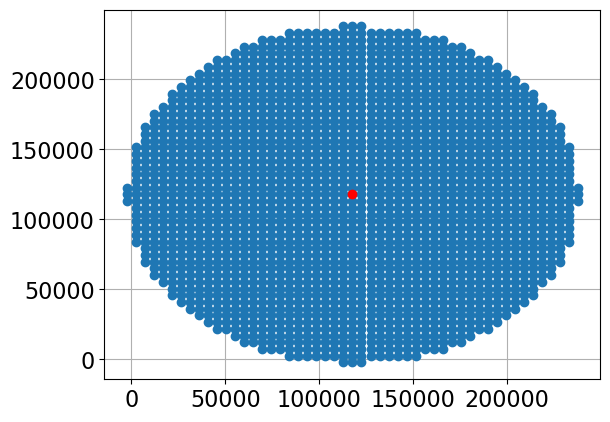

In [503]:
# Test of center and cell selection
import matplotlib.pyplot as plt
plt.plot(x0[idx,idy], y0[idx,idy], 'o')
plt.plot([nx//2],[ny//2],'or')
print(nx,ny)
plt.grid()

In [180]:
import asdf
tiles = asdf.open("skytiles.asdf")
tiles.info()

root (AsdfObject)
├─asdf_library (Software) ...
├─history (dict) ...
├─0 (NDArrayType): shape=(2401,), dtype=void1856
├─1 (NDArrayType): shape=(2413,), dtype=void1856
├─2 (NDArrayType): shape=(2413,), dtype=void1856
├─3 (NDArrayType): shape=(2413,), dtype=void1856
├─4 (NDArrayType): shape=(2413,), dtype=void1856
├─5 (NDArrayType): shape=(2413,), dtype=void1856
├─6 (NDArrayType): shape=(2413,), dtype=void1856
├─7 (NDArrayType): shape=(2413,), dtype=void1856
├─8 (NDArrayType): shape=(2413,), dtype=void1856
├─9 (NDArrayType): shape=(2403,), dtype=void1856
├─10 (NDArrayType): shape=(2403,), dtype=void1856
├─11 (NDArrayType): shape=(2403,), dtype=void1856
├─12 (NDArrayType): shape=(2403,), dtype=void1856
├─13 (NDArrayType): shape=(2403,), dtype=void1856
├─14 (NDArrayType): shape=(2403,), dtype=void1856
├─15 (NDArrayType): shape=(2403,), dtype=void1856
├─16 (NDArrayType): shape=(2403,), dtype=void1856
├─17 (NDArrayType): shape=(2403,), dtype=void1856
├─18 (NDArrayType): shape=(2403,), dtype=

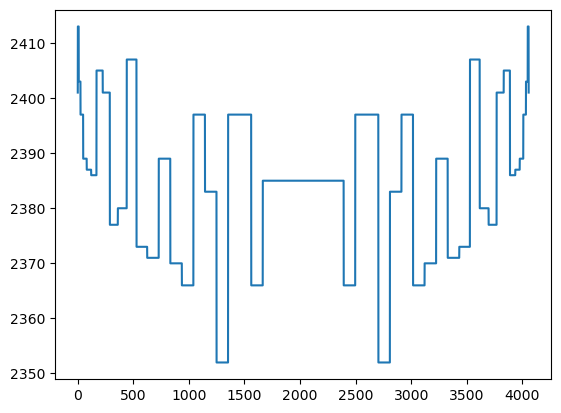

Median number of sky cells:  2385.0


In [181]:
# Number of sky tiles and their number of sky cells
ntiles = len(tiles.keys())-2
lentiles = [len(tiles[i]) for i in range(ntiles)]
plt.plot(lentiles)
plt.show()
print('Median number of sky cells: ', np.median(lentiles))

In [182]:
#ntiles = [len(t) for t in tiles]
ntiles = []
for t in tiles.tree:
    if t in ['asdf_library','history']:
        pass
    else:
        ntiles.append(np.sqrt(len(tiles[t])))

In [183]:
tiles[0].dtype

dtype([('name', '<U16'), ('tile_index', '<i4'), ('ra_center', '<f8'), ('dec_center', '<f8'), ('x_center', '<f4'), ('y_center', '<f4'), ('orientat', '<f4'), ('nx', '<i4'), ('ny', '<i4'), ('x0_projection', '<f4'), ('y0_projection', '<f4'), ('ra_corn1', '<f8'), ('dec_corn1', '<f8'), ('ra_corn2', '<f8'), ('dec_corn2', '<f8'), ('ra_corn3', '<f8'), ('dec_corn3', '<f8'), ('ra_corn4', '<f8'), ('dec_corn4', '<f8'), ('pixel_scale', '<f4'), ('ra_projection_center', '<f8'), ('dec_projection_center', '<f8'), ('orientat_projection_center', '<f4'), ('ra_tile_min', '<f8'), ('ra_tile_max', '<f8'), ('dec_tile_min', '<f8'), ('dec_tile_max', '<f8')])

Text(0, 0.5, 'Dec')

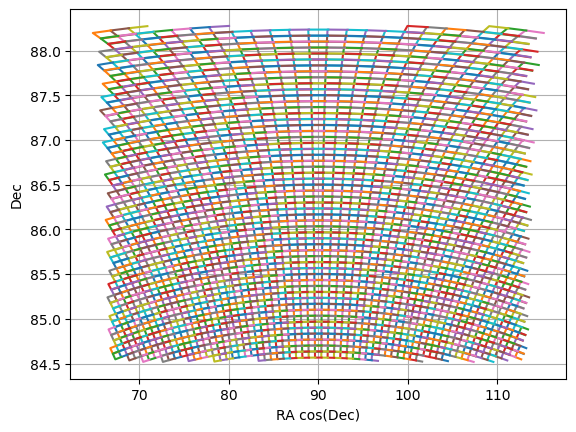

In [190]:
for c in tiles[3]:
    cosfac = np.cos(c['dec_corn1'] * np.pi/180)
    c0 = c['ra_projection_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    #c1 = (c1 - c0) * cosfac + c0
    #c2 = (c2 - c0) * cosfac + c0
    #c3 = (c3 - c0) * cosfac + c0
    #c4 = (c4 - c0) * cosfac + c0
    plt.plot([c1, c2, c3, c4],
             [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']])
plt.grid()
plt.xlabel('RA cos(Dec)')
plt.ylabel('Dec')

# Optimal size of tiles

In [95]:
# Andromeda at different redshifts
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import astropy.units as u
z=0.003
print('angular diameter [Andromeda in arcmin]' , cosmo.arcsec_per_kpc_proper(z)*50/60)
print('luminosity distance' ,cosmo.luminosity_distance(z))

angular diameter [Andromeda in arcmin] 13.427478060841898 arcsec / kpc
luminosity distance 12.878085428477496 Mpc


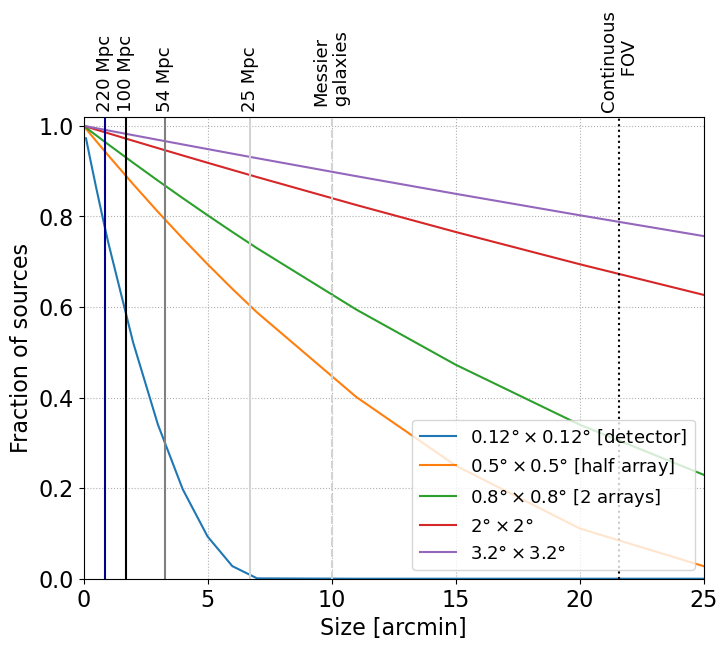

In [24]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0.1,0.3,0.5,0.8,1.0,2.0,3.0,4.0,5,6,7,11.,15,20,25])/60
tessel = 0.12
fig = plt.figure(figsize=(8,6)) 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.plot(x*60,(((tessel-x)/tessel).clip(min=0))**2,label='0.12$\degree\\times$0.12$\degree$ [detector]')
tessel = 0.5
plt.plot(x*60,((tessel-x)/tessel)**2,label='0.5$\degree\\times$0.5$\degree$ [half array]')
tessel = 0.8
plt.plot(x*60,((tessel-x)/tessel)**2,label='0.8$\degree\\times$0.8$\degree$ [2 arrays]')
tessel = 2
plt.plot(x*60,((tessel-x)/tessel)**2,label='2$\degree\\times$2$\degree$')
tessel = 3.2
plt.plot(x*60,((tessel-x)/tessel)**2,label='3.2$\degree\\times$3.2$\degree$')
plt.xlabel('Size [arcmin]')
plt.ylabel('Fraction of sources')
plt.vlines(0.85,0,1.02,color='darkblue')#,label='z = 0.05 (220 Mpc)')
plt.vlines(1.7,0,1.02,color='black')#,label='z = 0.025 (100 Mpc)')
plt.vlines(3.3,0,1.02,color='gray')#,label='z = 0.0125 (54 Mpc)')
plt.vlines(6.7,0,1.02,color='lightgray')#,label='z = 0.006 (25 Mpc)')
plt.vlines(10,0,1.02,ls='--',color='lightgray')#,label='z = 0.003 (13 Mpc)')
plt.vlines(21.6,0,1.02,ls=':',color='black')#,label='z = 0.003 (13 Mpc)')
plt.legend(loc=4, ncols=1, fontsize=13)
plt.xlim(0,25)
plt.ylim(0,1.02)
#plt.title('Nearby galaxies')
plt.grid(ls=':')
plt.text(0.85,1.04,'220 Mpc',rotation=90,horizontalalignment='center',fontsize=13)
plt.text(1.7,1.04,'100 Mpc',rotation=90,horizontalalignment='center',fontsize=13)
plt.text(3.3,1.04,'54 Mpc',rotation=90,horizontalalignment='center',fontsize=13)
plt.text(6.7,1.04,'25 Mpc',rotation=90,horizontalalignment='center',fontsize=13)
plt.text(10,1.04,'Messier\n galaxies',rotation=90,horizontalalignment='center',fontsize=13)
plt.text(21.6,1.04,'Continuous\n FOV',rotation=90,horizontalalignment='center',fontsize=13)
#plt.yscale('log')
fig.savefig('galaxysize.png',bbox_inches="tight")

In [37]:
print(_si.L_sun)

  Name   = Nominal solar luminosity
  Value  = 3.828e+26
  Uncertainty  = 0.0
  Unit  = W
  Reference = IAU 2015 Resolution B 3


# Distortion

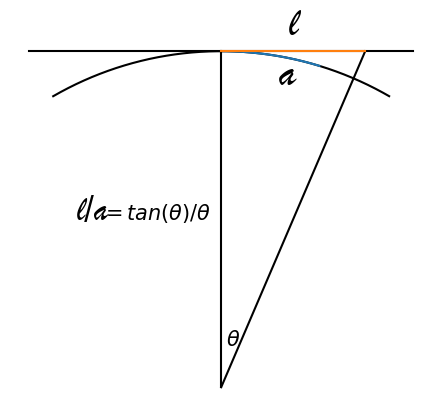

In [17]:
### Figure for computing the distortion
import matplotlib.pyplot as plt
import numpy as np
R = 7

#fig,ax = plt.figure()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_axis_off()
theta = np.arange(-30,30,0.01)
xcircle = R * np.sin(theta * np.pi/180)
ycircle = R * np.cos(theta * np.pi/180)
plt.plot(xcircle, ycircle,'k')


theta = np.arange(0,17,0.01)
xcircle = R * np.sin(theta * np.pi/180)
ycircle = R * np.cos(theta * np.pi/180)
plt.plot(xcircle, ycircle)

plt.plot([0,0],[0,R],'k')
plt.plot([-4,4],[R,R],'k')
plt.plot([0,3],[0,R],'k') 
plt.plot([0,3],[R,R])
#plt.axis('off')

plt.text(0.1,R/8,'$\\theta$', fontsize=15)
fontname = 'Brush Script MT'
plt.text(1.2, R*9/10, 'a', fontname=fontname, fontsize=30)
plt.text(1.4, R*10.5/10, 'l', fontname=fontname, fontsize=30)
plt.text(-3, R*.5, 'l/a', fontname=fontname, fontsize=25)
plt.text(-2.5, R*.5, '$= tan(\\theta)/\\theta$ ',fontsize=15)
plt.show()
fig.savefig('distortionSketch.png')

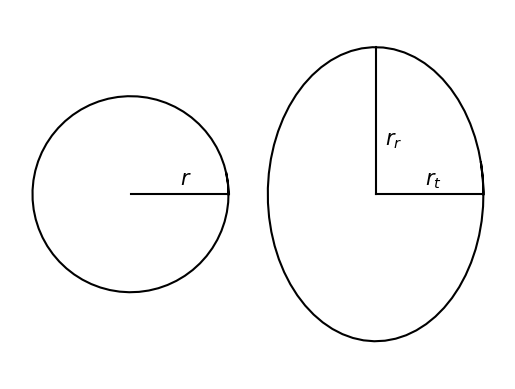

In [294]:
fig = plt.figure()
alpha = np.arange(0,2.1*np.pi,0.1)
r = 10
plt.plot(r * np.cos(alpha), r * np.sin(alpha), color='black')
plt.plot(r*1.1 * np.cos(alpha)+25, r*1.5 * np.sin(alpha), color='black')
plt.plot([0,r],[0,0], color='black')
plt.text(0.5*r,r/10,'$r$',fontsize=15)
plt.plot([0+25,r*1.1+25],[0,0], color='black')
plt.text(0.5*r+25,r/10,"$r_t$",fontsize=15)
plt.plot([25,25],[0,r*1.5], color='black')
plt.text(25+r/10,r/2,"$r_r$",fontsize=15)

plt.axis('equal')
plt.axis('off')
plt.show()
fig.savefig('distortionEllipse.png')

In [ ]:
### Figure for computing the distortion

R = 10
fig = plt.figure()
theta = np.arange(-20,20,0.01)
xcircle = R * np.sin(theta * np.pi/180)
ycircle = R * np.cos(theta * np.pi/180)
plt.plot(xcircle, ycircle,'k')


theta = np.arange(0,17,0.01)
xcircle = R * np.sin(theta * np.pi/180)
ycircle = R * np.cos(theta * np.pi/180)
plt.plot(xcircle, ycircle)

plt.plot([0,0],[0,R],'k')
plt.plot([-4,4],[R,R],'k')
plt.plot([0,3],[0,R],'k') 
plt.plot([0,3],[R,R])
plt.axis('off')

plt.text(0.1,R/8,'$\\theta$', fontsize=15)
fontname = 'Brush Script MT'
plt.text(1.2, R*9/10, 'a', fontname=fontname, fontsize=30)
plt.text(1.4, R*10.5/10, 'l', fontname=fontname, fontsize=30)
plt.text(-4, R*.5, '(l-a)/a', fontname=fontname, fontsize=25)
plt.text(-2.5, R*.5, '$= tan(\\theta)/\\theta$ ',fontsize=15)
plt.show()
fig.savefig('distortionSketch.png')

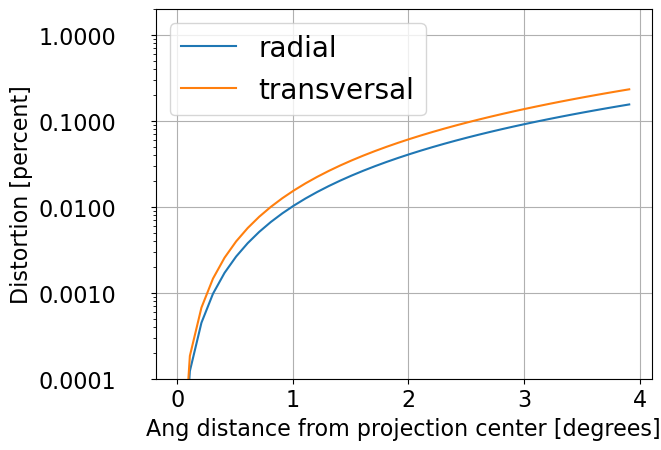

In [272]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
theta = np.arange(0.01,4,0.1)
dist = np.tan(theta * np.pi/180)/(theta * np.pi/180) -1
dist_ = 1/np.cos(theta * np.pi/180) -1
pixdist = (1/np.cos(theta * np.pi/180)**2-1)
pixdist_ = (1/np.cos(theta * np.pi/180)-1)

fig, ax = plt.subplots()
#ax.plot(theta, pixdist*100, label='$r_r$')
#ax.plot(theta, pixdist_*100, label='$r_t$')
ax.plot(theta, dist*100,label='radial')
ax.plot(theta, dist_*100,label='transversal')
ax.grid()
ax.set_yscale('log')
ax.set_ylim(.0001,2)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.4f}'))
ax.tick_params(axis='y', which='major', pad=25)
ax.set_ylabel('Distortion [percent]')
ax.set_xlabel('Ang distance from projection center [degrees]')
plt.legend(fontsize=20)
fig.savefig('DistortionPlot.png'.format(itile),bbox_inches="tight", pad_inches=0.2)#, transparent=True)
#fig.savefig('DistortionPixelPlot.png'.format(itile),bbox_inches="tight", pad_inches=0.2)#, transparent=True)
plt.show()

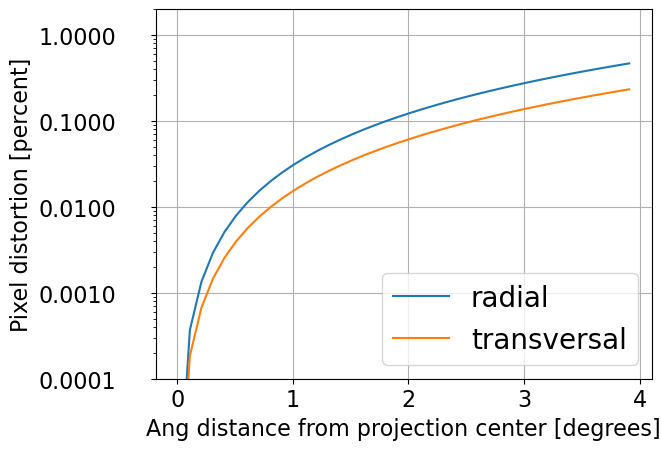

In [295]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
theta = np.arange(0.01,4,0.1)
pixdist = np.tan(theta * np.pi/180)**2
pixdist_ = (1/np.cos(theta * np.pi/180)-1)

fig, ax = plt.subplots()
ax.plot(theta, pixdist*100, label='radial')
ax.plot(theta, pixdist_*100, label='transversal')
#ax.plot(theta, dist*100,label='radial distortion')
#ax.plot(theta, dist_*100,label='transversal distortion')
ax.grid()
ax.set_yscale('log')
ax.set_ylim(.0001,2)
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.4f}'))
ax.tick_params(axis='y', which='major', pad=25)
ax.set_ylabel('Pixel distortion [percent]')
ax.set_xlabel('Ang distance from projection center [degrees]')
plt.legend(fontsize=20)
fig.savefig('DistortionPixelPlot.png'.format(itile),bbox_inches="tight", pad_inches=0.2)#, transparent=True)
plt.show()

## Tissot's indicatrix for gnomonic projections

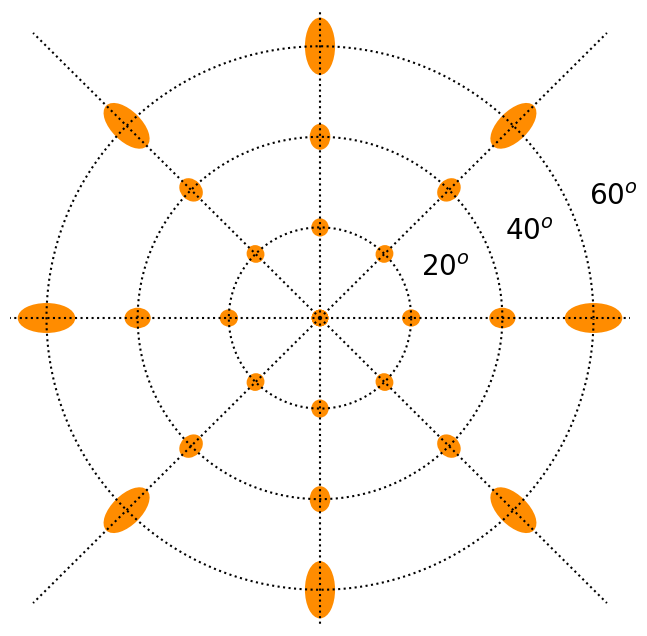

In [344]:
from matplotlib.patches import Ellipse


angle = np.arange(0,2*np.pi, 0.01)
r1, r2, r3 = 20,40,60
cosa = np.cos(angle)
sina = np.sin(angle)

fig,ax = plt.subplots(figsize=(8,8))
#plt.axis('equal')
plt.axis('off')
ax.plot(r1*cosa, r1*sina,'k:')
ax.plot(r2*cosa, r2*sina,'k:')
ax.plot(r3*cosa, r3*sina,'k:')
rad = np.arange(0,90)
angles = np.arange(0,2*np.pi, np.pi/4)
for a in angles:
    ax.plot(rad*np.cos(a), rad*np.sin(a),'k:')
ax.set_ylim(-68,68)
ax.set_xlim(-68,68)

r = 3
rads = [0,20,40,60]
for rad in rads:
    for a in angles:
        mina = r / np.cos(rad * np.pi/180)
        maxa = r / np.cos(rad * np.pi/180)**2
        ellipse = Ellipse(xy=(rad*np.cos(a), rad*np.sin(a)), width=mina, height=maxa, angle=a*180/np.pi+90,
                        edgecolor='darkorange', fc='darkorange', lw=2)
        ax.add_patch(ellipse)

for a in [20,40,60]:
    ax.text((a+4)*np.cos(23*np.pi/180), (a+4)*np.sin(23*np.pi/180),str(a)+'$^o$',fontsize=20)
fig.savefig('Tissot.png'.format(itile),bbox_inches="tight", pad_inches=0.2)#, transparent=True)
plt.show()

# Figure with FITS and Python systems

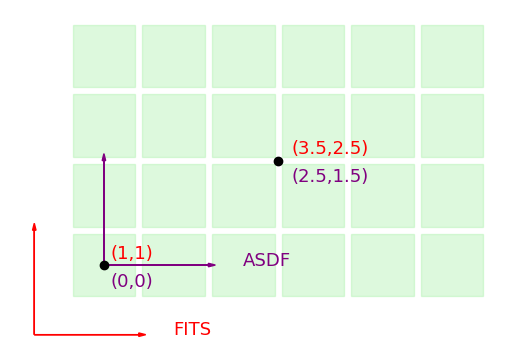

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.collections as coll


fig = plt.figure()
ax = plt.subplot(111, aspect='equal')

wid = 0.9
hei = 0.9
nrows = 4
ncols = 6
inbetween = 0.1

xx = np.arange(inbetween/2, ncols, (wid+inbetween))
yy = np.arange(inbetween/2, nrows, (hei+inbetween))
pat = []
for xi in xx:
    for yi in yy:
        sq = patches.Rectangle((xi, yi), wid, hei, fill=True, color='lightgreen',alpha=0.3)
        ax.add_patch(sq)
pc = coll.PatchCollection(pat)
ax.add_collection(pc)

ax.arrow(0.5, 0.5, 0., 1.5, head_width=0.05, head_length=0.1, fc='purple', ec='purple')
ax.arrow(0.5, 0.5, 1.5, 0., head_width=0.05, head_length=0.1, fc='purple', ec='purple')
ax.arrow(-0.5, -0.5, 0, 1.5, head_width=0.05, head_length=0.1, fc='r', ec='r')
ax.arrow(-0.5, -0.5, 1.5, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')

ax.text(1.5, -0.5, 'FITS', color='r',fontsize=13)
ax.text(2.5, 0.5, 'ASDF', color='purple',fontsize=13)
ax.plot([3.0],[2.0],'o',color='k')
ax.text(3.2,2.1,'(3.5,2.5)',color='r',fontsize=13)
ax.text(3.2,1.7,'(2.5,1.5)',color='purple',fontsize=13)

ax.plot([0.5],[0.5],'o',color='k')
ax.text(0.6,0.6,'(1,1)',color='r',fontsize=13)
ax.text(0.6,0.2,'(0,0)',color='purple',fontsize=13)

plt.axis('off')
fig.savefig('systems.pdf',bbox_inches="tight")
plt.show()